In [17]:
%load_ext autoreload
%autoreload 2

import network_creation_igraph as nc
import osmnx as ox
import os
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import contextily as ctx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# NETWORKS
# data/networks/

#RESULT FIGURES
# data/figures/

In [52]:
crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

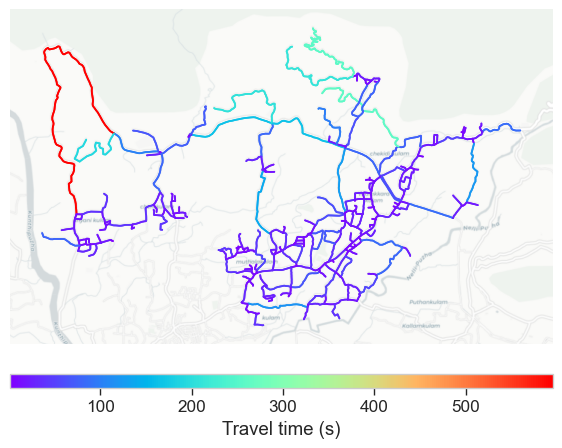

In [222]:
# # Load the network as a igraph object
# place_names = "Thenkara, India"
# place_names = [place_names]
# G, crs = nc.prepare_network(place_names, force_redownload=True)

G = ig.Graph.Read_Pickle("data/networks/India/Thenkara/Thenkara.pkl")
network_features = pd.read_csv("data/networks/India/Thenkara/Thenkara_features.csv")
crs = network_features.crs.iloc[0]
# Plot the network with edge attribute travel_time
fig, map_ax = nc.plot_network_with_edge_attribute(G, crs = crs, attribute_name="travel_time", cmap = "rainbow",
                                                  colorbar_label="Travel time (s)", figsize = (7,7),
                                                    node_size=0, legend = True,
                                                    )

plt.draw()
output_dir = "data/figures"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "Sample_map.png")
plt.savefig(output_file, bbox_inches='tight', dpi=600,facecolor='white', transparent=False)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

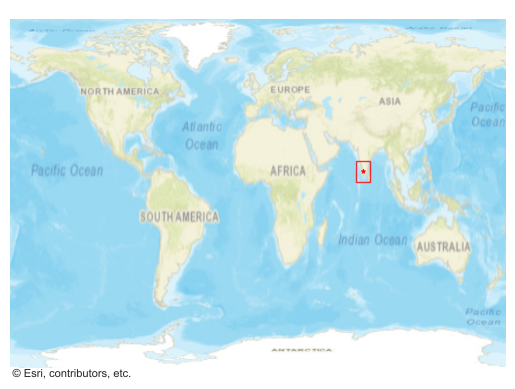

In [241]:
nc.plot_world_location(G, crs, figsize=(5,5), zoom=1)

[0.11502863862619665] [np.float64(0.29494559958968175)]
[0.1231049581595356] [np.float64(0.21845041455078518)]
[0.12351304150394558] [np.float64(0.19607442961066335)]
[0.12246951544244378] [np.float64(0.24412844598347722)]
[0.1338661717292018] [np.float64(0.43096202633550273)]
[0.13400884359102302] [np.float64(0.2984897570200569)]
[0.12467873541472461] [np.float64(0.24369354001312005)]
[0.1448312027797661] [np.float64(0.37828096345706635)]
[0.13461300059959633] [np.float64(0.4035286104016851)]
[0.1413926500992037] [np.float64(0.4111542804365859)]
[0.13174039970848342] [np.float64(0.346816012393692)]
[0.13124846533649345] [np.float64(0.2977874592718269)]
[0.12617240632686086] [np.float64(0.20846714395203578)]
[0.12694568834098063] [np.float64(0.32107212361106446)]
[0.1378729854214359] [np.float64(0.25015627953456865)]
[0.13526603724976463] [np.float64(0.4265931404657093)]
[0.12170518815072062] [np.float64(0.21946888572158713)]
[0.1244052256297959] [np.float64(0.4345096567304609)]
[0.134

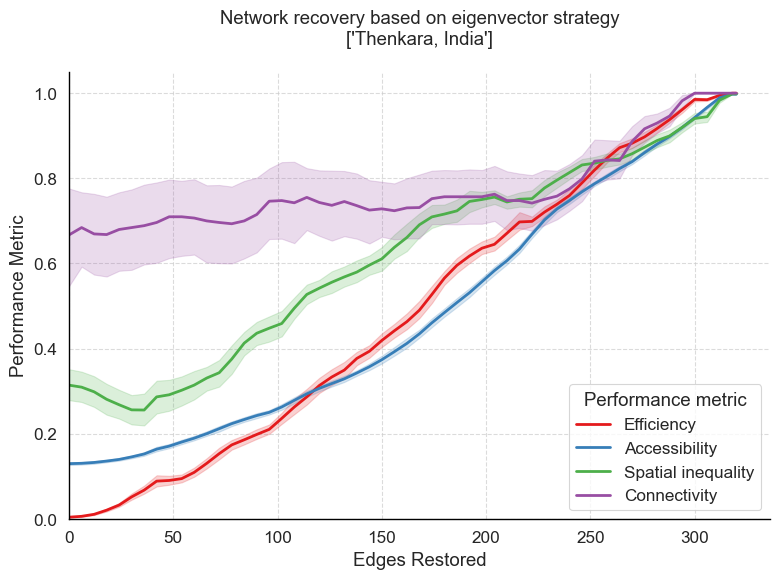

In [181]:
# Run disruptions for a given damage percentage and strategy and plot the results
strategy = "eigenvector" 
iterations = 20
damage_pct = 50
single_results = nc.run_singlepct_experiment(
    G, damage_pct=damage_pct, iterations=iterations, strategy = strategy, restore_step=2)
nc.plot_single_results(single_results, place_names, metric = "all")

In [9]:
single_results[single_results["strategy"] == "eigenvector"].head()

,disruption_iter,restore_iter,efficiency,accessibility,morans_i,clustering,edges_restored,edges_remaining,strategy,disruption_pct,restore_pct
0,0,0,0.003791,0.131111,0.309706,0.477612,0,320,eigenvector,50,2
1,0,1,0.004271,0.131426,0.307751,0.477612,6,314,eigenvector,50,2
2,0,2,0.006642,0.132848,0.298913,0.626866,12,308,eigenvector,50,2
3,0,3,0.014240,0.135919,0.276617,0.567164,18,302,eigenvector,50,2
4,0,4,0.019427,0.138107,0.263844,0.567164,24,296,eigenvector,50,2


In [10]:
# import time
# print("Current time:", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
# strategy  = "all"
# expt_results = nc.run_multiple_damage_experiments(G, strategy = strategy, 
#                                                   iterations_per_damage=30, restore_pct=5)
# expt_results.to_csv(folder_path/f"results_{strategy}.csv", index=False)
# print("Current time:", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))

# Data analysis and modelling

In [18]:
# Get all the places with both _all.csv and _features.csv files
places_dict = {}
metrics_dict = {}

for root, dirs, files in os.walk("data/networks"):
    all_files = set(files)
    
    all_csv_files = [f for f in files if f.endswith('_all.csv')]
    
    for all_file in all_csv_files:
        base_name = all_file.replace('_all.csv', '')
        features_file = f"{base_name}_features.csv"
        
        if features_file in all_files:
            city_name = base_name
            places_dict[city_name] = os.path.join(root, all_file)
            metrics_dict[city_name] = os.path.join(root, features_file)

print("Places dict:", places_dict)
print("Metrics dict:", metrics_dict)

Places dict: {'Berat': 'data/networks\\data\\networks\\Albania\\Berat\\Berat_all.csv', 'Gjirokastër': 'data/networks\\data\\networks\\Albania\\Gjirokastër\\Gjirokastër_all.csv', 'South_Hill': 'data/networks\\data\\networks\\Anguilla\\South_Hill\\South_Hill_all.csv', 'Cafayate': 'data/networks\\data\\networks\\Argentina\\Cafayate\\Cafayate_all.csv', 'El_Chalten': 'data/networks\\data\\networks\\Argentina\\El_Chalten\\El_Chalten_all.csv', 'Alice_Springs': 'data/networks\\data\\networks\\Australia\\Alice_Springs\\Alice_Springs_all.csv', 'Coober_Pedy': 'data/networks\\data\\networks\\Australia\\Coober_Pedy\\Coober_Pedy_all.csv', 'Leonora': 'data/networks\\data\\networks\\Australia\\Leonora\\Leonora_all.csv', 'Wiluna': 'data/networks\\data\\networks\\Australia\\Wiluna\\Wiluna_all.csv', 'Yulara': 'data/networks\\data\\networks\\Australia\\Yulara\\Yulara_all.csv', 'Hallstatt': 'data/networks\\data\\networks\\Austria\\Hallstatt\\Hallstatt_all.csv', 'Hall_in_Tirol': 'data/networks\\data\\networ

In [19]:
df_list = []
for place_name, csv_file in places_dict.items():
    df = pd.read_csv(csv_file)
    df["place_name"] = place_name
    df_list.append(df)

df = pd.concat(df_list, ignore_index=True)

df["restore_pct_status"] = 100 * df["edges_restored"] / (
    df["edges_restored"] + df["edges_remaining"]
)

metrics_list = []
for place_name, metrics_file in metrics_dict.items():
    try:
        metrics_df = pd.read_csv(metrics_file)
        metric_names = metrics_df.columns.tolist()
        metrics_df["place_name"] = place_name
        metrics_list.append(metrics_df)
    except Exception as e:
        print(f"Warning: Could not read {metrics_file}: {e}")
if metrics_list:
    metrics_df_full = pd.concat(metrics_list, ignore_index=True)
    df = pd.merge(df, metrics_df_full[["place_name"]], on="place_name", how="left")

df = df.drop(columns=["restore_pct", "restore_iter", "disruption_pct"], errors='ignore')
metrics = ['efficiency', 'accessibility', 'morans_i', 'clustering']
id_vars = [col for col in df.columns if col not in metrics]
df_melted = df.melt(id_vars=id_vars, value_vars=metrics, var_name='metric', value_name='metric_value')

group_cols = ['place_name', 'damage_pct', 'disruption_iter'] #+ metric_names
groups = df_melted.groupby(group_cols)
def is_valid_group(group):
    if group.isna().any().any():
        
        return False
    invalid_metrics = group[(group['edges_remaining'] == 0) & (group['metric_value'] < 0.99)]
    if len(group) > 0 and (group['metric_value'].nunique() / len(group)) < 0.5:
        return False

    return invalid_metrics.empty
valid_groups = [name for name, group in groups if is_valid_group(group)]
df = df[df[group_cols].apply(tuple, axis=1).isin(valid_groups)]

df.head()

,damage_pct,strategy,disruption_iter,edges_restored,edges_remaining,efficiency,accessibility,morans_i,clustering,place_name,restore_pct_status
0,10,betweenness,0,0,168,0.243818,0.640276,0.980571,0.893258,Berat,0.000000
1,10,betweenness,0,8,160,0.802303,0.752143,0.858760,0.915730,Berat,4.761905
2,10,betweenness,0,16,152,0.914802,0.842317,0.842160,0.949438,Berat,9.523810
3,10,betweenness,0,24,144,0.904343,0.871964,0.872245,0.949438,Berat,14.285714
4,10,betweenness,0,32,136,0.928111,0.896438,0.858249,0.949438,Berat,19.047619


In [20]:
df.place_name.nunique(),

(223,)

In [21]:
# Network characteristics
metrics_df_full.head()

,n_nodes,n_edges,density,avg_degree,degree_stddev,global_clustering,avg_clustering,assortativity_degree,total_length,avg_length,total_travel_time,avg_travel_time,crs,longitude,latitude,place_name
0,695,1687,0.003498,4.854676,1.806592,0.052023,0.053939,0.014542,164113.105588,97.281035,21728.995330,12.880258,EPSG:32634,412126.877741,4.506405e+06,Berat
1,434,1004,0.005343,4.626728,1.821233,0.040881,0.039958,0.004369,125992.109098,125.490149,15202.371179,15.141804,EPSG:32634,426797.205672,4.436717e+06,Gjirokastër
2,807,1843,0.002833,4.567534,1.877298,0.082264,0.083627,-0.032611,463878.062414,251.697267,55267.325390,29.987697,EPSG:32620,493758.519953,2.013618e+06,South_Hill
3,490,1308,0.005459,5.338776,1.563462,0.038503,0.046142,0.313154,141686.121322,108.322723,16561.283404,12.661532,EPSG:32720,201572.187243,7.113224e+06,Cafayate
4,98,275,0.028929,5.612245,1.314229,0.035928,0.038194,0.345785,27070.524242,98.438270,2437.864120,8.864960,EPSG:32718,653384.775152,4.533662e+06,El_Chalten


In [22]:
# Missing networks
missing_places = set(places_dict.keys()) - set(df['place_name'].unique())
print("Missing places:", missing_places)

Missing places: {'Kotor'}


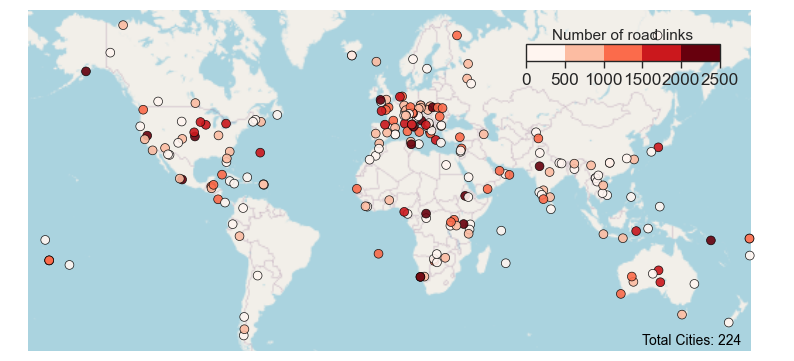

In [23]:
import seaborn as sns
sns.set_style("ticks")
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import math

gdf = nc.convert_to_target_crs(metrics_df_full, target_crs="EPSG:3857")
min_n_edges = 0
gdf_plot = gdf[gdf["n_edges"] >= min_n_edges].copy()

cmap = plt.get_cmap("Reds")  # Use a colormap that is perceptually uniform
bounds = np.arange(0, math.ceil(gdf['n_edges'].max()) + 200, 500)
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, (ax_map) = plt.subplots(1, 1, figsize=(10, 6))
plt.subplots_adjust(wspace=0.1)
gdf.plot(
    column='n_edges',
    norm=norm,
    cmap=cmap,
    alpha=0.9,
    edgecolor='black',
    vmin=0,
    legend=False,
    ax=ax_map,
    linewidth=0.5,
    markersize=40 # gdf['n_edges'] / 35,
)

ctx.add_basemap(ax_map, crs=gdf.crs.to_string(),
                source=ctx.providers.OpenStreetMap.Mapnik,
                attribution=False)
ax_map.set_axis_off()

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cax = inset_axes(
    ax_map,
    width="25%",
    height="5%",
    loc="upper right",
    bbox_to_anchor=(-0.04, -0.00, 1, 1),
    bbox_transform=ax_map.transAxes,
    borderpad=2,
)

cbar = plt.colorbar(sm, cax=cax, orientation="horizontal")
cbar.set_label("Number of road links", labelpad=-42, fontsize=11)
cbar.ax.set_facecolor("white")

total_cities = gdf_plot['place_name'].nunique()
ax_map.annotate(f'Total Cities: {total_cities}', xy=(0.88, 0.03), 
            xycoords='axes fraction',
            ha='center', va='center', 
            fontsize=10, 
            color='black')

output_dir = "data/figures"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "road_networks_map.png")
plt.savefig(output_file, bbox_inches='tight', dpi=600)

In [27]:
world.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58, 2..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.2455, 51.75744 24.29407,..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


In [28]:
import geopandas as gpd
from shapely.geometry import Point

from geodatasets import get_path
import geopandas as gpd

world = gpd.read_file("data/others/ne_110m_admin_0_countries.shp")
continents = world.dissolve(by="CONTINENT", as_index=False)[["CONTINENT", "geometry"]]
gdf = gdf.to_crs(4326)
continents = continents.to_crs(4326)

points_with_continent = gpd.sjoin(
    gdf, continents, how="left", predicate="within"
)

counts = points_with_continent.groupby("CONTINENT").size().rename("n_points")

print(counts.sort_values(ascending=False))


CONTINENT
Europe           66
Asia             39
North America    32
Africa           28
Oceania          11
South America     7
Name: n_points, dtype: int64


In [ ]:
# count number of countries in data/networks
import os
base_path = "data/networks"

num_folders = len(next(os.walk(base_path))[1])
print(f"Number of main folders in {base_path}: {num_folders}")

Number of main folders in data/networks: 156


In [ ]:
new_names = {
    'n_edges': 'Number\nof edges',
    'density': 'Density',
    'avg_degree': 'Average\ndegree',
    'degree_stddev': 'Degree\nstandard\ndeviation',
    'global_clustering': 'Global\nclustering\ncoefficient',
    'avg_clustering': 'Average\nclustering\ncoefficient',
    'assortativity_degree': 'Assortativity\nby degree',
    'avg_length': 'Average\nlink length',
    'avg_travel_time': 'Average link\ntravel time',
}

# df_long = gdf.melt(
#     id_vars=["place_name"],
#     value_vars=list(new_names.keys()),
#     var_name="Metric",
#     value_name="Value"
# )

# df_long["Metric_label"] = df_long["Metric"].map(new_names)

groups = {
    "Size & Connectivity": ["n_edges", "density", "avg_degree", "degree_stddev"],
    "Clustering": ["global_clustering", "avg_clustering", "assortativity_degree"],
    "Spatial": ["avg_length", "avg_travel_time"],
}


summary_stats = gdf[list(new_names.keys())].describe().T
summary_stats['Metric'] = summary_stats.index.map(new_names)
summary_stats = summary_stats[['Metric', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

print("Summary Statistics Table:")
print("="*80)
print(summary_stats.to_string(float_format="%.2f"))

Summary Statistics Table:
                                                Metric  count   mean    std   min    25%    50%     75%     max
n_edges                               Number\nof edges 224.00 799.08 637.01 14.00 262.25 657.50 1266.00 2427.00
density                                        Density 224.00   0.02   0.03  0.00   0.00   0.01    0.02    0.21
avg_degree                             Average\ndegree 224.00   4.83   0.60  3.10   4.44   4.77    5.19    6.50
degree_stddev              Degree\nstandard\ndeviation 224.00   1.80   0.19  1.19   1.69   1.81    1.94    2.21
global_clustering      Global\nclustering\ncoefficient 224.00   0.08   0.05  0.01   0.05   0.07    0.10    0.40
avg_clustering        Average\nclustering\ncoefficient 224.00   0.08   0.06  0.01   0.05   0.07    0.10    0.57
assortativity_degree          Assortativity\nby degree 224.00   0.04   0.18 -0.33  -0.09   0.01    0.17    0.51
avg_length                        Average\nlink length 224.00 292.52 528.42 53

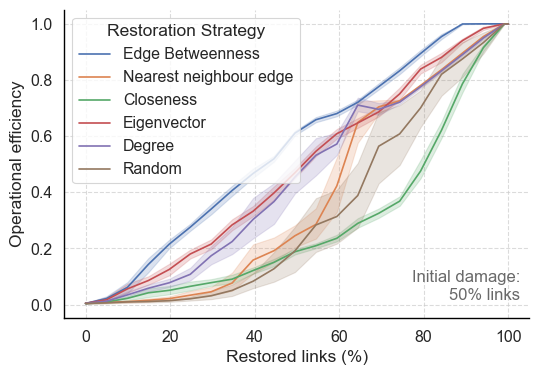

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
place_name = "Thenkara"
fig2, plot_ax = nc.plot_restoration_across_strategies(df, damage_pct=50, 
                                                      place_name=place_name, figsize=(6, 4))

output_dir = "data/figures"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "Sample_strategies_90pct.png")
plt.savefig(output_file, bbox_inches='tight', dpi=600,facecolor='white', transparent=False)

KeyboardInterrupt: 

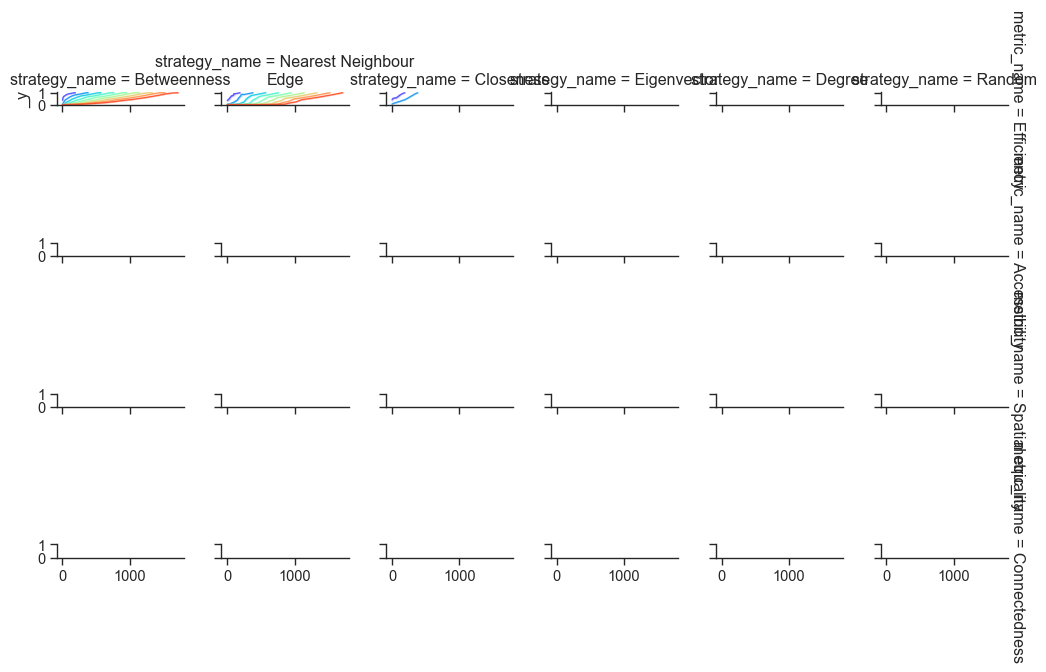

In [161]:
df['damage_pct'] = pd.Categorical(df['damage_pct'], categories=sorted(df['damage_pct'].unique()), ordered=True)

place_name = "Honiara"
plot_data = df[df['place_name'] == place_name]

y_metrics = ['efficiency', 'accessibility', 'morans_i', 'clustering']
strategies = ['betweenness', 'nearneighbour_edge', 'closeness', 'eigenvector', 'degree', 'random']

y_metrics_map = {
    'efficiency': 'Efficiency',
    'accessibility': 'Accessibility',
    'morans_i': "Spatial equality",
    'clustering': 'Connectedness'
}

strategies_map = {
    'betweenness': 'Betweenness',
    'nearneighbour_edge': 'Nearest Neighbour\nEdge',
    'closeness': 'Closeness',
    'eigenvector': 'Eigenvector',
    'degree': 'Degree',
    'random': 'Random'
}
sns.set(style="ticks", context="paper", font_scale=1.2)

nrows = len(y_metrics)
ncols = len(strategies)


# Prepare melted data
melted_data = plot_data.melt(
    id_vars=['strategy', 'damage_pct', 'edges_restored'],
    value_vars=y_metrics,
    var_name='metric',
    value_name='value'
)

melted_data['metric_name'] = melted_data['metric'].map(y_metrics_map)
melted_data['strategy_name'] = melted_data['strategy'].map(strategies_map)

# Create the plot
g = sns.relplot(
    data=melted_data,
    x="edges_restored",
    y="value",
    hue="damage_pct",
    col="strategy_name",
    row="metric_name",
    kind="line",
    palette="rainbow",
    height=1.5,
    aspect=1.15,
    estimator="median",
    errorbar=("ci", 95),
    facet_kws={'sharex': True, 'sharey': 'row', 'margin_titles': True},
    alpha=0.9,
    linewidth=1,
    legend=True
)
g.fig.set_size_inches(10,7.5)

g.set_axis_labels("Restored links", "")
g.set_titles(col_template="{col_name}", row_template="")


for i, axes_row in enumerate(g.axes):
    for j, ax in enumerate(axes_row):
        ax.set_yticks(np.arange(0, 1.05, 0.25))
        ax.set_ylim(0, 1.05)
        ax.grid(True, linestyle="--", alpha=0.7, color='gray')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        if j == 0:
            metric_name = melted_data['metric_name'].unique()[i]
            ax.set_ylabel(metric_name, labelpad=15, fontsize=12)
        else:
            ax.set_ylabel("")
            ax.tick_params(labelleft=False)
        
        if i < len(g.axes) - 1:
            ax.set_xlabel("")
            ax.tick_params(labelbottom=False)

if g._legend is not None:
    handles = [h for h in g._legend.legend_handles]
    labels = [t.get_text() for t in g._legend.texts]
    g._legend.remove()
else:
    handles, labels = g.axes[0][0].get_legend_handles_labels()

for handle in handles:
    handle.set_linewidth(2)

for ax in g.axes.flat:
    if ax.get_title():  # If the axis has a title
        title = ax.get_title()
        ax.set_title(title, fontsize=12)

g.fig.legend(
    handles, 
    [f"{label}%" for label in labels], 
    title="Initial damage (%)", 
    loc='lower center', 
    bbox_to_anchor=(0.5, -0.08),
    ncol = 5,
    frameon=True,
    fontsize=12,
)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])

output_dir = "data/figures"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "strategy_metrics_combo.pdf")
plt.savefig(output_file, bbox_inches='tight', dpi=600, facecolor='white')
plt.show()

In [35]:
import numpy as np
from scipy.interpolate import interp1d
from statsmodels.nonparametric.smoothers_lowess import lowess

def area_above_curve(x, y, method='trapezoidal', reference='min', loess_frac=0.3):
    x = np.asarray(x)
    y = np.asarray(y)
    sort_idx = np.argsort(x)
    x = x[sort_idx]
    y = y[sort_idx]
    
    if isinstance(reference, str):
        if reference == 'min':
            ref_level = 0
        elif reference == 'max':
            ref_level = 1
        elif reference == 'mean':
            ref_level = np.mean(y)
        else:
            raise ValueError("Invalid reference string. Use 'min', 'max', 'mean', or a numeric value.")
    else:
        try:
            ref_level = float(reference)
        except:
            raise ValueError("Reference must be 'min', 'max', 'mean', or a numeric value.")
    
    ref_line = np.full_like(y, ref_level)
    
    if method == 'trapezoidal':
        total_area = np.trapezoid(ref_line, x)
        curve_area = np.trapezoid(y, x)
        area_above = total_area - curve_area
    
    elif method == 'loess':
        smoothed = lowess(y, x, frac=loess_frac, return_sorted=False)
        f = interp1d(x, smoothed, kind='linear', fill_value='extrapolate')
        
        total_area = np.trapezoid(ref_line, x)
        curve_area = np.trapezoid(smoothed, x)
        area_above = total_area - curve_area
    
    else:
        raise ValueError("Method must be either 'trapezoidal' or 'loess'")
    
    return area_above

In [36]:
grouped = df.groupby([
    'place_name', 'strategy', 'damage_pct', 'disruption_iter',
])

results = []
i = 0
processed_combinations = set() 

for name, group in grouped:
    if i % 10000 == 0:
        print(f"Processing group {i}: {name}")
    (
        place, strategy, damage_pct, disruption_iter,
    ) = name

    combo_key = (place, strategy)
    if combo_key not in processed_combinations:
        for iter_num in range(1, 20):  # Create 30 iterations
            zero_damage = {
                'place_name': place,
                'strategy': strategy,
                'damage_pct': 0,
                'disruption_iter': iter_num,
                'efficiency_loss': 0.0,
                'accessibility_loss': 0.0,
                'morans_i_loss': 0.0,
                'clustering_loss': 0.0
            }
            results.append(zero_damage)
        processed_combinations.add(combo_key)
        # print(f"Added 30 zero-damage rows for {place} - {strategy}")

    result = {
        'place_name': place,
        'strategy': strategy,
        'damage_pct': damage_pct,
        'disruption_iter': disruption_iter,
    }

    metrics = ['efficiency', 'accessibility', 'morans_i', 'clustering']
    for metric in metrics:
        x = group['restore_pct_status'].values
        y = group[metric].values
        area = area_above_curve(x, y, method='trapezoidal', reference='max')/100
        result[f'{metric}_loss'] = area
    
    results.append(result)
    i += 1

resilience_df = pd.DataFrame(results)

C:\Users\srijithbalakrishnan\AppData\Local\Temp\ipykernel_31796\1751084931.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby([


Processing group 0: ('Abilene', 'betweenness', np.int64(10), np.int64(0))
Processing group 10000: ('Arrowtown', 'nearneighbour_edge', np.int64(50), np.int64(11))
Processing group 20000: ('Bar_Harbor', 'degree', np.int64(30), np.int64(5))
Processing group 30000: ('Bibury', 'eigenvector', np.int64(90), np.int64(24))
Processing group 40000: ('Byblos', 'eigenvector', np.int64(80), np.int64(24))
Processing group 50000: ('Cockburn_Town', 'closeness', np.int64(40), np.int64(22))
Processing group 60000: ('Don_Khon', 'nearneighbour_edge', np.int64(70), np.int64(24))
Processing group 70000: ('Funafuti', 'random', np.int64(90), np.int64(22))
Processing group 80000: ('Goderich', 'closeness', np.int64(80), np.int64(22))
Processing group 90000: ('Gulcha', 'degree', np.int64(30), np.int64(20))
Processing group 100000: ('Homer', 'random', np.int64(50), np.int64(11))
Processing group 110000: ('Koror', 'degree', np.int64(10), np.int64(8))
Processing group 120000: ('Lekeitio', 'eigenvector', np.int64(10)

Iteration 0: avg_length and avg_travel_time have correlation 0.97. Dropping avg_travel_time
Iteration 1: global_clustering and avg_clustering have correlation 0.96. Dropping avg_clustering
Iteration 2: n_edges and density have correlation 0.55. Dropping density
Iteration 3: degree_stddev and assortativity_degree have correlation 0.42. Dropping assortativity_degree
Iteration 4: degree_stddev and global_clustering have correlation 0.41. Dropping global_clustering
No pairs with correlation > 0.4. Done.


Index(['n_edges', 'avg_degree', 'degree_stddev', 'avg_length'], dtype='object')

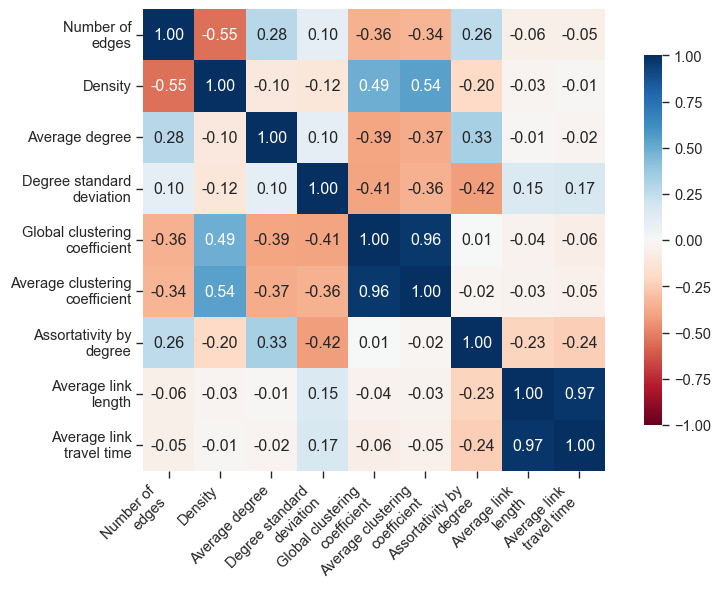

In [37]:
#correlation plot of metric_columns

import seaborn as sns
import matplotlib.pyplot as plt

metric_columns = ['n_edges', 'density', 'avg_degree', 'degree_stddev', 'global_clustering', 'avg_clustering', 
                  'assortativity_degree', 'avg_length', 'avg_travel_time', 'place_name']
new_names = columns={
    'n_edges': 'Number of\nedges',
    'density': 'Density',
    'avg_degree': 'Average degree',
    'degree_stddev': 'Degree standard\ndeviation',
    'global_clustering': 'Global clustering\ncoefficient',
    'avg_clustering': 'Average clustering\ncoefficient',
    'assortativity_degree': 'Assortativity by\ndegree',
    'avg_length': 'Average link\nlength',
    'avg_travel_time': 'Average link\ntravel time',
    'place_name': 'Place',
}
metrics_df_full2 = metrics_df_full.rename(new_names, axis=1)

cmap = pal1 = "RdBu"

fig, ax = plt.subplots(figsize=(10, 6))
corr_df = metrics_df_full2[[col for col in new_names.values() if col !='Place']]
corr = corr_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap=cmap, square=True, cbar_kws={"shrink": .8,}, alpha = 1, ax =ax, vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right')

corr_df = corr_df.rename({v: k for k, v in new_names.items()}, axis=1)

output_dir = "data/figures"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "correlation_matrix.png")
plt.savefig(output_file, bbox_inches='tight', dpi=600)


def recursively_remove_correlated_vars(df, threshold=0.85, verbose=True):
    df = df.copy()
    iteration = 0

    while True:
        corr_matrix = df.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        max_corr = upper.max().max()
        if max_corr < threshold:
            if verbose:
                print(f"No pairs with correlation > {threshold}. Done.")
            break
        col1, col2 = np.where(upper == max_corr)
        var1 = upper.columns[col1[0]]
        var2 = upper.columns[col2[0]]

        mean_corr = upper.mean()
        drop_var = var1 if mean_corr[var1] >= mean_corr[var2] else var2

        if verbose:
            print(f"Iteration {iteration}: {var1} and {var2} have correlation {max_corr:.2f}. Dropping {drop_var}")

        df.drop(columns=drop_var, inplace=True)
        iteration += 1

    return df

metrics_df_full_reduced = recursively_remove_correlated_vars(corr_df, threshold=0.4)
metrics_df_full_reduced.columns


In [38]:
#merge resilience_df with metrics_df_full on 'place_name'
resilience_df = pd.merge(resilience_df, metrics_df_full[metrics_df_full_reduced.columns.to_list() + ['place_name']], on='place_name', how='left')
resilience_df.head()

,place_name,strategy,damage_pct,disruption_iter,efficiency_loss,accessibility_loss,morans_i_loss,clustering_loss,n_edges,avg_degree,degree_stddev,avg_length
0,Abilene,betweenness,0,1,0.0,0.0,0.0,0.0,1469,5.983707,1.830868,127.252559
1,Abilene,betweenness,0,2,0.0,0.0,0.0,0.0,1469,5.983707,1.830868,127.252559
2,Abilene,betweenness,0,3,0.0,0.0,0.0,0.0,1469,5.983707,1.830868,127.252559
3,Abilene,betweenness,0,4,0.0,0.0,0.0,0.0,1469,5.983707,1.830868,127.252559
4,Abilene,betweenness,0,5,0.0,0.0,0.0,0.0,1469,5.983707,1.830868,127.252559


In [39]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Define your variables
continuous_vars = {
    'Dependent Variables': [
        'efficiency_loss',
        'accessibility_loss',
        'morans_i_loss',
        'clustering_loss'
    ],
    'Independent Variables (Continuous)': [
        'damage_pct',
        'n_edges',
        'avg_degree',
        'degree_stddev',
        'avg_length'
    ]
}

categorical_vars = ['strategy']

# Initialize a list to hold all rows for the final table
table_rows = []

# --- 1. Add a header for Dependent Variables ---
table_rows.append(["\\multicolumn{5}{l}{\\textit{Dependent Variables}}"])

# Calculate stats for each dependent variable
for var in continuous_vars['Dependent Variables']:
    data = resilience_df[var].clip(lower=0, upper=1)  # Clip negative values to zero
    pretty_name = var.replace('_', ' ').title()
    row = [
        f"\\quad {pretty_name}",
        f"{len(data):,}",
        f"{data.mean():.3f} ({data.std():.3f})",
        f"{data.min():.3f}",
        f"{data.max():.3f}"
    ]
    table_rows.append(row)

# --- 2. Add a mid-rule and header for Continuous Predictors ---
table_rows.append(["\\midrule"])
table_rows.append(["\\multicolumn{5}{l}{\\textit{Independent Variables (Continuous)}}"])

# Calculate stats for each continuous predictor
for var in continuous_vars['Independent Variables (Continuous)']:
    data = resilience_df[var]
    pretty_name = var.replace('_', ' ').title()
    # Format damage as percentage without decimals, others with
    if var == 'damage_pct':
        mean_str = f"{data.mean():.1f}"
        std_str = f"{data.std():.1f}"
        min_str = f"{data.min():.1f}"
        max_str = f"{data.max():.1f}"
    else:
        mean_str = f"{data.mean():.1f}"
        std_str = f"{data.std():.1f}"
        min_str = f"{data.min():.1f}"
        max_str = f"{data.max():.1f}"
    
    row = [
        f"\\quad {pretty_name}",
        f"{len(data):,}",
        f"{mean_str} ({std_str})",
        f"{min_str}",
        f"{max_str}"
    ]
    table_rows.append(row)

# --- 3. Add a mid-rule and header for Categorical Predictor ---
table_rows.append(["\\midrule"])
table_rows.append(["\\multicolumn{5}{l}{\\textit{Independent Variables (Categorical)}}"])
table_rows.append(["\\textbf{Recovery Strategy}", "\\textbf{n}", "\\textbf{\\%}", "", ""])

# Calculate stats for the categorical variable
for var in categorical_vars:
    counts = resilience_df[var].value_counts()
    percentages = (resilience_df[var].value_counts(normalize=True) * 100).round(1)

    for category in counts.index:
        row = [
            f"\\quad {category}",
            f"{counts[category]:,}",
            f"{percentages[category]:.1f}",
            "",
            ""
        ]
        table_rows.append(row)

# --- 4. Define the LaTeX table header ---
latex_header = """
\\begin{table}[h!]
\\centering
\\caption{Descriptive Statistics of the Model Dataset}
\\label{tab:summary_stats}
\\small
\\begin{tabular}{@{}lrrrrr@{}}
\\toprule
 &  & \\multicolumn{4}{c}{\\textbf{Summary Statistics}} \\\\
\\cmidrule(l){3-6}
\\textbf{Variable} & \\textbf{N} & \\textbf{Mean (SD)} & \\textbf{Min} & \\textbf{Max} \\\\
\\midrule
"""

latex_footer = """\\bottomrule
\\end{tabular}
\\end{table}
"""

# --- 5. Generate the complete LaTeX table ---
# Generate the table body
latex_body = tabulate(table_rows, tablefmt="latex_raw", stralign="right")

# Combine header, body, and footer
complete_latex_table = latex_header + latex_body + latex_footer

# Print the complete LaTeX code
print(complete_latex_table)

# Optional: Save to a .tex file
with open("summary_statistics.tex", "w") as f:
    f.write(complete_latex_table)


\begin{table}[h!]
\centering
\caption{Descriptive Statistics of the Model Dataset}
\label{tab:summary_stats}
\small
\begin{tabular}{@{}lrrrrr@{}}
\toprule
 &  & \multicolumn{4}{c}{\textbf{Summary Statistics}} \\
\cmidrule(l){3-6}
\textbf{Variable} & \textbf{N} & \textbf{Mean (SD)} & \textbf{Min} & \textbf{Max} \\
\midrule
\begin{tabular}{rrrrr}
\hline
                 \multicolumn{5}{l}{\textit{Dependent Variables}} &            &               &       &        \\
                                            \quad Efficiency Loss &    289,146 & 0.447 (0.264) & 0.000 &  0.941 \\
                                         \quad Accessibility Loss &    289,146 & 0.369 (0.217) & 0.000 &  0.992 \\
                                              \quad Morans I Loss &    289,146 & 0.246 (0.212) & 0.000 &  1.000 \\
                                            \quad Clustering Loss &    289,146 & 0.239 (0.216) & 0.000 &  0.987 \\
                                                         \midrule &   

In [40]:
import statsmodels.api as sm
from statsmodels.othermod.betareg import BetaModel
import pandas as pd
import numpy as np


def beta_regression_with_interactions(df, metric, network_metrics_df=None):
    metric_col = f'{metric}_loss'
    
    # Data preparation
    df_clean = df.copy()
    df_clean[metric_col] = pd.to_numeric(df_clean[metric_col], errors='coerce').clip(0, 1)
    df_clean = df_clean.dropna(subset=["place_name"])
    df_clean = df_clean.dropna(subset=[metric_col])
    df_clean['damage_pct'] = 100 - df_clean['damage_pct']
    
    # Handle 0/1 boundaries for beta regression
    epsilon = 1e-5
    y = np.clip(df_clean[metric_col], epsilon, 1-epsilon)
    
    # Create strategy dummies with random as reference
    if 'strategy' in df_clean.columns:
        strategies = df_clean['strategy'].unique()
        if 'random' in strategies:
            strategies = ['random'] + [s for s in strategies if s != 'random']
            df_clean['strategy'] = pd.Categorical(
                df_clean['strategy'],
                categories=strategies,
                ordered=False
            )
        
        df_clean = pd.get_dummies(df_clean, columns=['strategy'], drop_first=True, dtype=int)
    
    # Create interaction terms
    strategy_dummies = [col for col in df_clean.columns if col.startswith('strategy_')]
    for strategy_col in strategy_dummies:
        df_clean[f'damage_pct*{strategy_col}'] = df_clean['damage_pct'] * df_clean[strategy_col]
    
    # Prepare design matrix
    X = df_clean[[
    'damage_pct',
    *strategy_dummies,
    *[col for col in df_clean.columns if col.startswith('damage_pct*')],
    *network_metrics_df.columns  # Replaces the manual list
    ]]
    X = sm.add_constant(X)
    
    # Fit beta regression
    model = BetaModel(y, X).fit()
    return model


metrics = ['efficiency', 'accessibility', 'morans_i', 'clustering']
models = {}

for metric in metrics:
    print(f"\n{'='*80}")
    print(f"Beta Regression for {metric}")
    print(f"{'='*80}")
    
    models[metric] = beta_regression_with_interactions(
        resilience_df.copy(), 
        metric,
        network_metrics_df=metrics_df_full_reduced
    )
    print(models[metric].summary())


Beta Regression for efficiency
                              BetaModel Results                               
Dep. Variable:        efficiency_loss   Log-Likelihood:             2.9227e+05
Model:                      BetaModel   AIC:                        -5.845e+05
Method:            Maximum Likelihood   BIC:                        -5.843e+05
Date:                Thu, 09 Oct 2025                                         
Time:                        10:42:06                                         
No. Observations:              289146                                         
Df Residuals:                  289129                                         
Df Model:                          15                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      

In [42]:
from scipy import stats

for metric, model in models.items():
    print("LogLik (full):", model.llf)
    print("LogLik (null):", model.llnull)
    lr_stat = -2 * (model.llnull - model.llf)
    lr_df = model.df_model
    lr_pvalue = stats.chi2.sf(lr_stat, lr_df)
    print(f"\nLikelihood Ratio Test for {metric}:")
    print(f"LR Statistic: {lr_stat:.4f}, df: {lr_df}, p-value: {lr_pvalue:.4f}")


LogLik (full): 292272.07462299627
LogLik (null): 89396.74193970952

Likelihood Ratio Test for efficiency:
LR Statistic: 405750.6654, df: 15, p-value: 0.0000
LogLik (full): 291008.7840762655
LogLik (null): 88720.4809104956

Likelihood Ratio Test for accessibility:
LR Statistic: 404576.6063, df: 15, p-value: 0.0000
LogLik (full): 307068.8127288914
LogLik (null): 207554.0202721134

Likelihood Ratio Test for morans_i:
LR Statistic: 199029.5849, df: 15, p-value: 0.0000
LogLik (full): 478218.73459078535
LogLik (null): 315337.28126166685

Likelihood Ratio Test for clustering:
LR Statistic: 325762.9067, df: 15, p-value: 0.0000


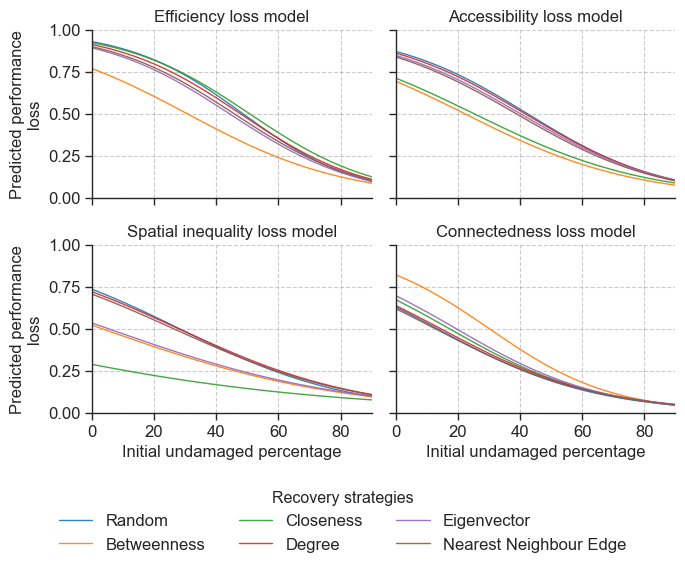

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm

sns.set_style("ticks")
sns.set_context("paper", font_scale=1.2)

y_metrics_map = {
    'efficiency': 'Efficiency loss',
    'accessibility': 'Accessibility loss',
    'morans_i': "Spatial inequality loss",
    'clustering': 'Connectedness loss'
}

strategies_map = {
    'betweenness': 'Betweenness',
    'nearneighbour_edge': 'Nearest Neighbour Edge',
    'closeness': 'Closeness',
    'eigenvector': 'Eigenvector',
    'degree': 'Degree',
    'random': 'Random'
}

best_strategy = {
    'efficiency': 'Betweenness',
    'accessibility': 'Betweenness,\nCloseness',
    'morans_i': 'Betweenness',
    'clustering': 'Random,\nNearest Neighbour Edge,\nDegree'
}

fig, axes = plt.subplots(2, 2, figsize=(7,5), sharex=True, sharey=True)
axes = axes.flatten()

network_metrics_means = metrics_df_full_reduced.mean().to_dict()
strategy_names = ['random', 'betweenness', 'closeness', 'degree', 'eigenvector', 'nearneighbour_edge']
colors = sns.color_palette("tab10", len(strategy_names))

for i, metric in enumerate(metrics):
    model = models[metric]
    ax = axes[i]
    
    functional_range = np.linspace(0, 100, 100)
    

    params = model.params
    vcov = model.cov_params()
    param_names = model.params.index
    
    for j, strategy in enumerate(strategy_names):
        strategy_effects = []
        lower_bounds = []
        upper_bounds = []
        
        for functional_pct in functional_range:
            scenario = {'const': 1, 'damage_pct': functional_pct}
            for strat in strategy_names:
                scenario[f'strategy_{strat}'] = 1 if strat == strategy else 0
            for strat in strategy_names:
                scenario[f'damage_pct*strategy_{strat}'] = functional_pct if strat == strategy else 0
            for metric_name, mean_val in network_metrics_means.items():
                scenario[metric_name] = mean_val
            
            X_vec = np.array([scenario.get(name, 0) for name in param_names])
            linear_predictor = np.dot(X_vec, params)
            var_linear = np.dot(X_vec.T, np.dot(vcov, X_vec))
            prediction = np.exp(linear_predictor) / (1 + np.exp(linear_predictor))
            z_value = norm.ppf(0.975)
            linear_lower = linear_predictor - z_value * np.sqrt(var_linear)
            linear_upper = linear_predictor + z_value * np.sqrt(var_linear)
            
            pred_lower = np.exp(linear_lower) / (1 + np.exp(linear_lower))
            pred_upper = np.exp(linear_upper) / (1 + np.exp(linear_upper))
            
            # Store
            strategy_effects.append(prediction)
            lower_bounds.append(pred_lower)
            upper_bounds.append(pred_upper)
        
        # Plot mean prediction
        ax.plot(functional_range, strategy_effects, 
                label=strategies_map[strategy],
                linewidth=1, alpha=0.9,
                color=colors[j])
        #annotate best strategy
        best_strat = best_strategy[metric]
        if best_strat in strategies_map:
            ax.annotate(f"Best: {strategies_map[best_strat]}", xy=(0.5, 0.5), xycoords="axes fraction",
                        fontsize=10, ha="center", va="center", bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

        # Plot confidence interval
        # ax.fill_between(functional_range, lower_bounds, upper_bounds, alpha=0.1)

    ax.set_title(f"{y_metrics_map[metric]} model", fontsize=12)
    ax.set_xlabel("Initial undamaged percentage", fontsize=12)
    # ax.set_xlabel("Initial damage percentage", fontsize=12)
    ax.set_ylabel("Predicted performance\nloss", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.4, color='gray')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 90)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])

# X label only for bottom row, Y label only for first column
for i, ax in enumerate(axes):
    if i < 2:
        ax.set_xlabel("")
    if i % 2 == 1:
        ax.set_ylabel("")

# Add a common legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', fontsize=12, ncol=3, 
           bbox_to_anchor=(0.5, -0.18), title="Recovery strategies", frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("marginal_effects_styled.pdf", dpi=300, bbox_inches="tight")
plt.show()
